In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns, numpy as np
from sklearn.metrics import confusion_matrix , classification_report


In [2]:
cancer_sein = pd.read_csv("data.csv")
cancer_sein

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
print(cancer_sein.shape)

(569, 33)


In [4]:
del cancer_sein['Unnamed: 32']
cancer_de_sein = cancer_sein.drop_duplicates(keep=False)
cancer_de_sein = cancer_de_sein.dropna()

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cancer_de_sein["diagnosis"] = encoder.fit_transform(cancer_de_sein["diagnosis"])
cancer_de_sein.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
print(" Le Type des données: \n",cancer_de_sein.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
cancer_de_sein.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


In [8]:
cancer_de_sein.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:

colonnes= cancer_de_sein.columns 
print("les colonne de notre data set : {}".format(np.array(colonnes)),end = "\n\n")


les colonne de notre data set : ['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']



In [10]:

categorical_columns =(cancer_de_sein.select_dtypes(include = [object]).columns)
print("-> les colonne qui represente une categorie sont  : {}".format(categorical_columns), end = "\n\n")


-> les colonne qui represente une categorie sont  : Index([], dtype='object')



In [11]:

numerical_columns =(cancer_de_sein.select_dtypes(include = [np.number]).columns)
print("-> les colonne qui represente une categorie sont : \n{}".format(numerical_columns))

-> les colonne qui represente une categorie sont : 
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


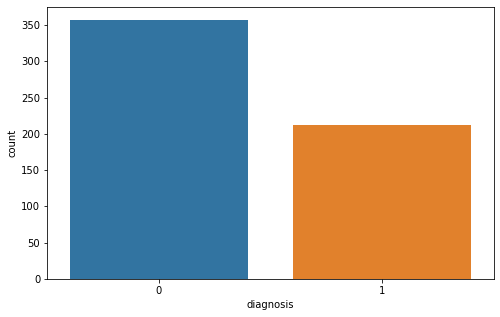

In [12]:

plt.figure(figsize=(8,5))
ax = sns.countplot(x='diagnosis',data=cancer_de_sein)



In [13]:
## check the target feature 
print("Malin -> 1 , Benin -> 0")
cancer_de_sein.diagnosis.value_counts()

Malin -> 1 , Benin -> 0


0    357
1    212
Name: diagnosis, dtype: int64

/home/tachour/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimens

Text(0, 0.5, 'probability ')

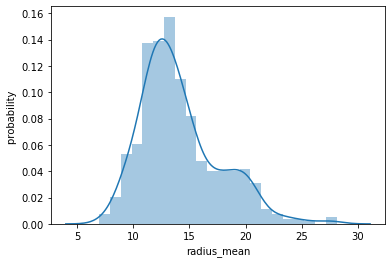

In [14]:
sns.distplot(cancer_de_sein['radius_mean'])
plt.ylabel("probability ")

/home/tachour/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimens

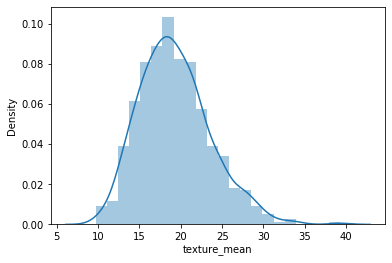

In [15]:
sns.distplot(cancer_de_sein['texture_mean'])

/home/tachour/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimens

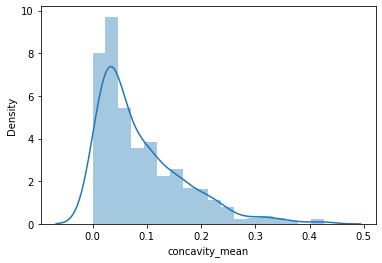

In [16]:
sns.distplot(cancer_de_sein['concavity_mean'])

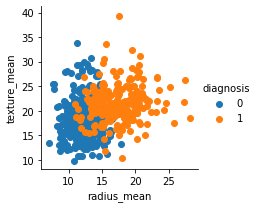

In [17]:
sns.FacetGrid(cancer_de_sein, hue='diagnosis').map(plt.scatter, 'radius_mean','texture_mean').add_legend()  ## a lot of overlapping with the target feature

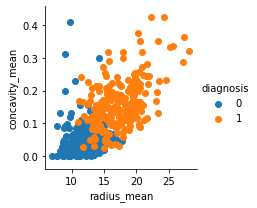

In [18]:
sns.FacetGrid(cancer_de_sein, hue='diagnosis').map(plt.scatter, 'radius_mean','concavity_mean').add_legend()  ## a lot of overlapping with the target feature

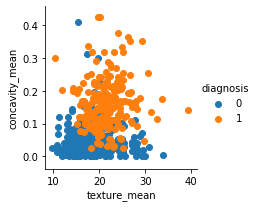

In [19]:
sns.FacetGrid(cancer_de_sein, hue='diagnosis').map(plt.scatter, 'texture_mean','concavity_mean').add_legend()  ## a lot of overlapping with the target feature

In [ ]:
sns.pairplot(cancer_de_sein, hue='diagnosis')

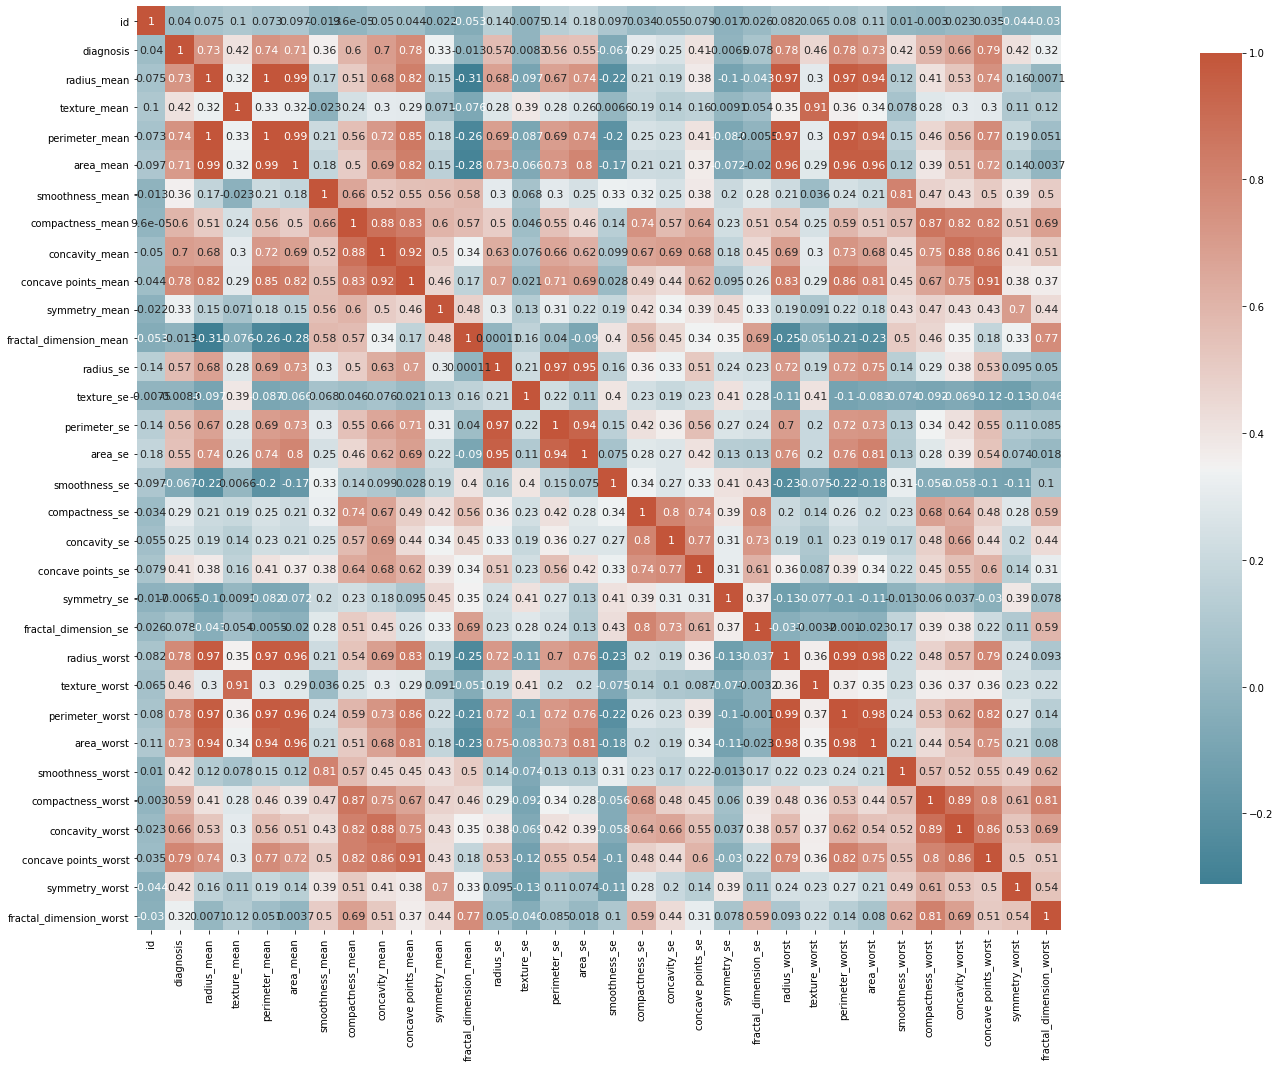

In [20]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 50 , 17 ) )
    cmap = sns.diverging_palette( 220 , 20 , as_cmap = True )
    s = sns.heatmap(corr, cmap = cmap, square=True,
                    cbar_kws={ 'shrink' : .9 },ax=ax,
                    annot = True, annot_kws = { 'fontsize' : 11 }
)
plot_correlation_map(cancer_de_sein)

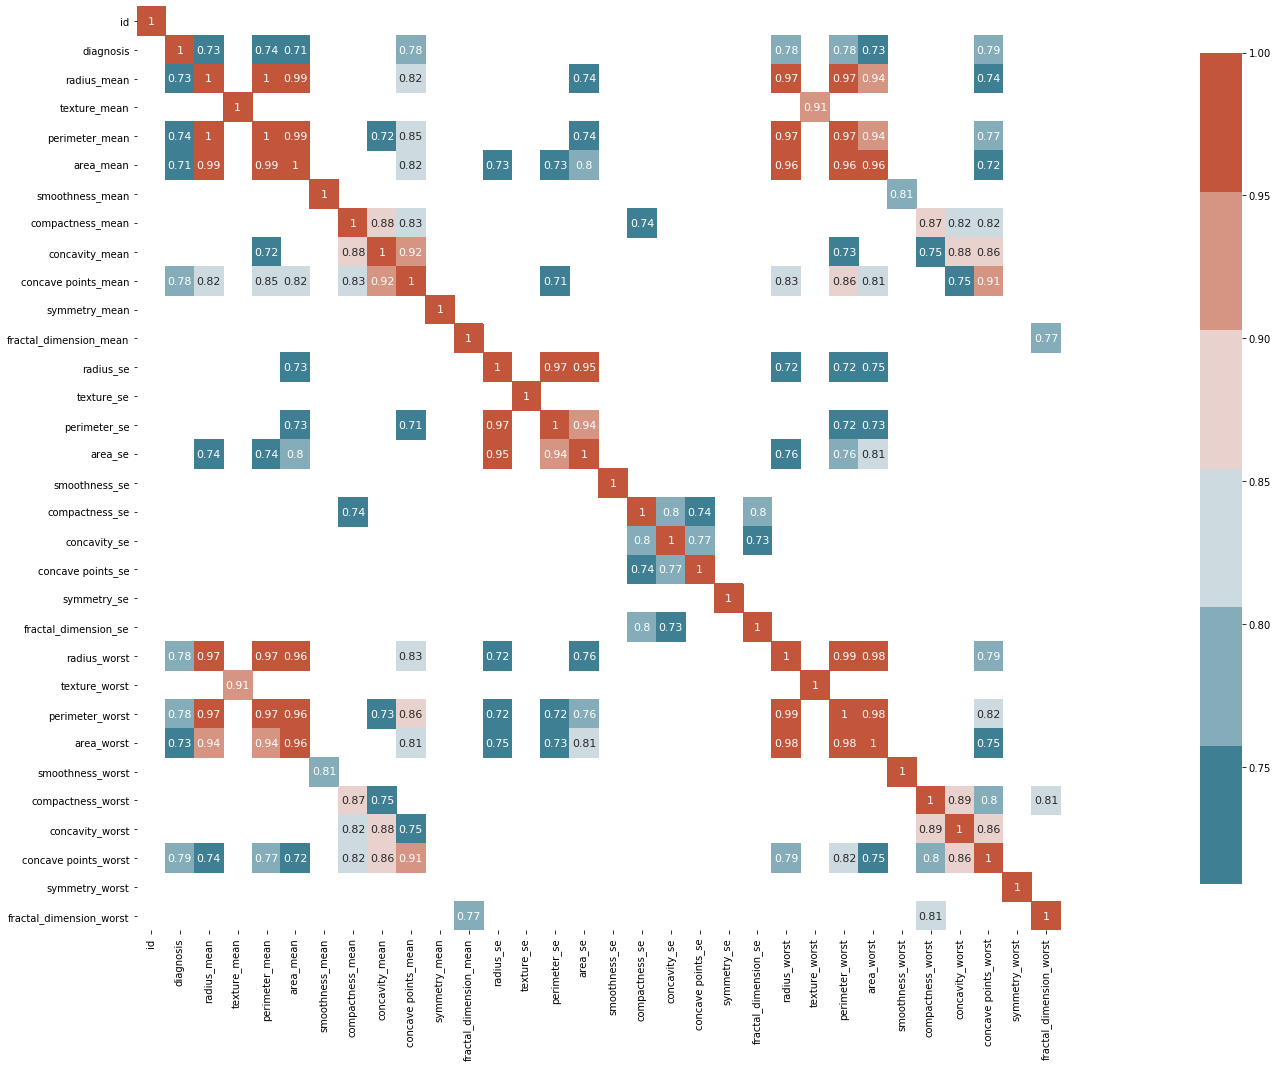

In [21]:
def plot_correlation_map1( df ):
    corr = df.corr()
    corr_mat = corr[((corr > 0.7) | (corr < -0.7))]
    s , ax = plt.subplots( figsize =( 50 , 17 ) )
    cmap = sns.diverging_palette( 220 , 20 , as_cmap = False )
    s = sns.heatmap(corr_mat, cmap = cmap, square=True,
                    cbar_kws={ 'shrink' : .9 },ax=ax,
                    annot = True, annot_kws = { 'fontsize' : 11 }
)
plot_correlation_map1(cancer_de_sein)

    D'après la map de correlation on voit crairement qu'il y a que 8 colonnes qui ont une grande corrélation avec "diagnosis" qui sont : 
   [ 'radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_worst' 'perimeter_worst', 'area_worst', 'concave points_worst' ]

In [24]:
cancer = cancer_de_sein[['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']]

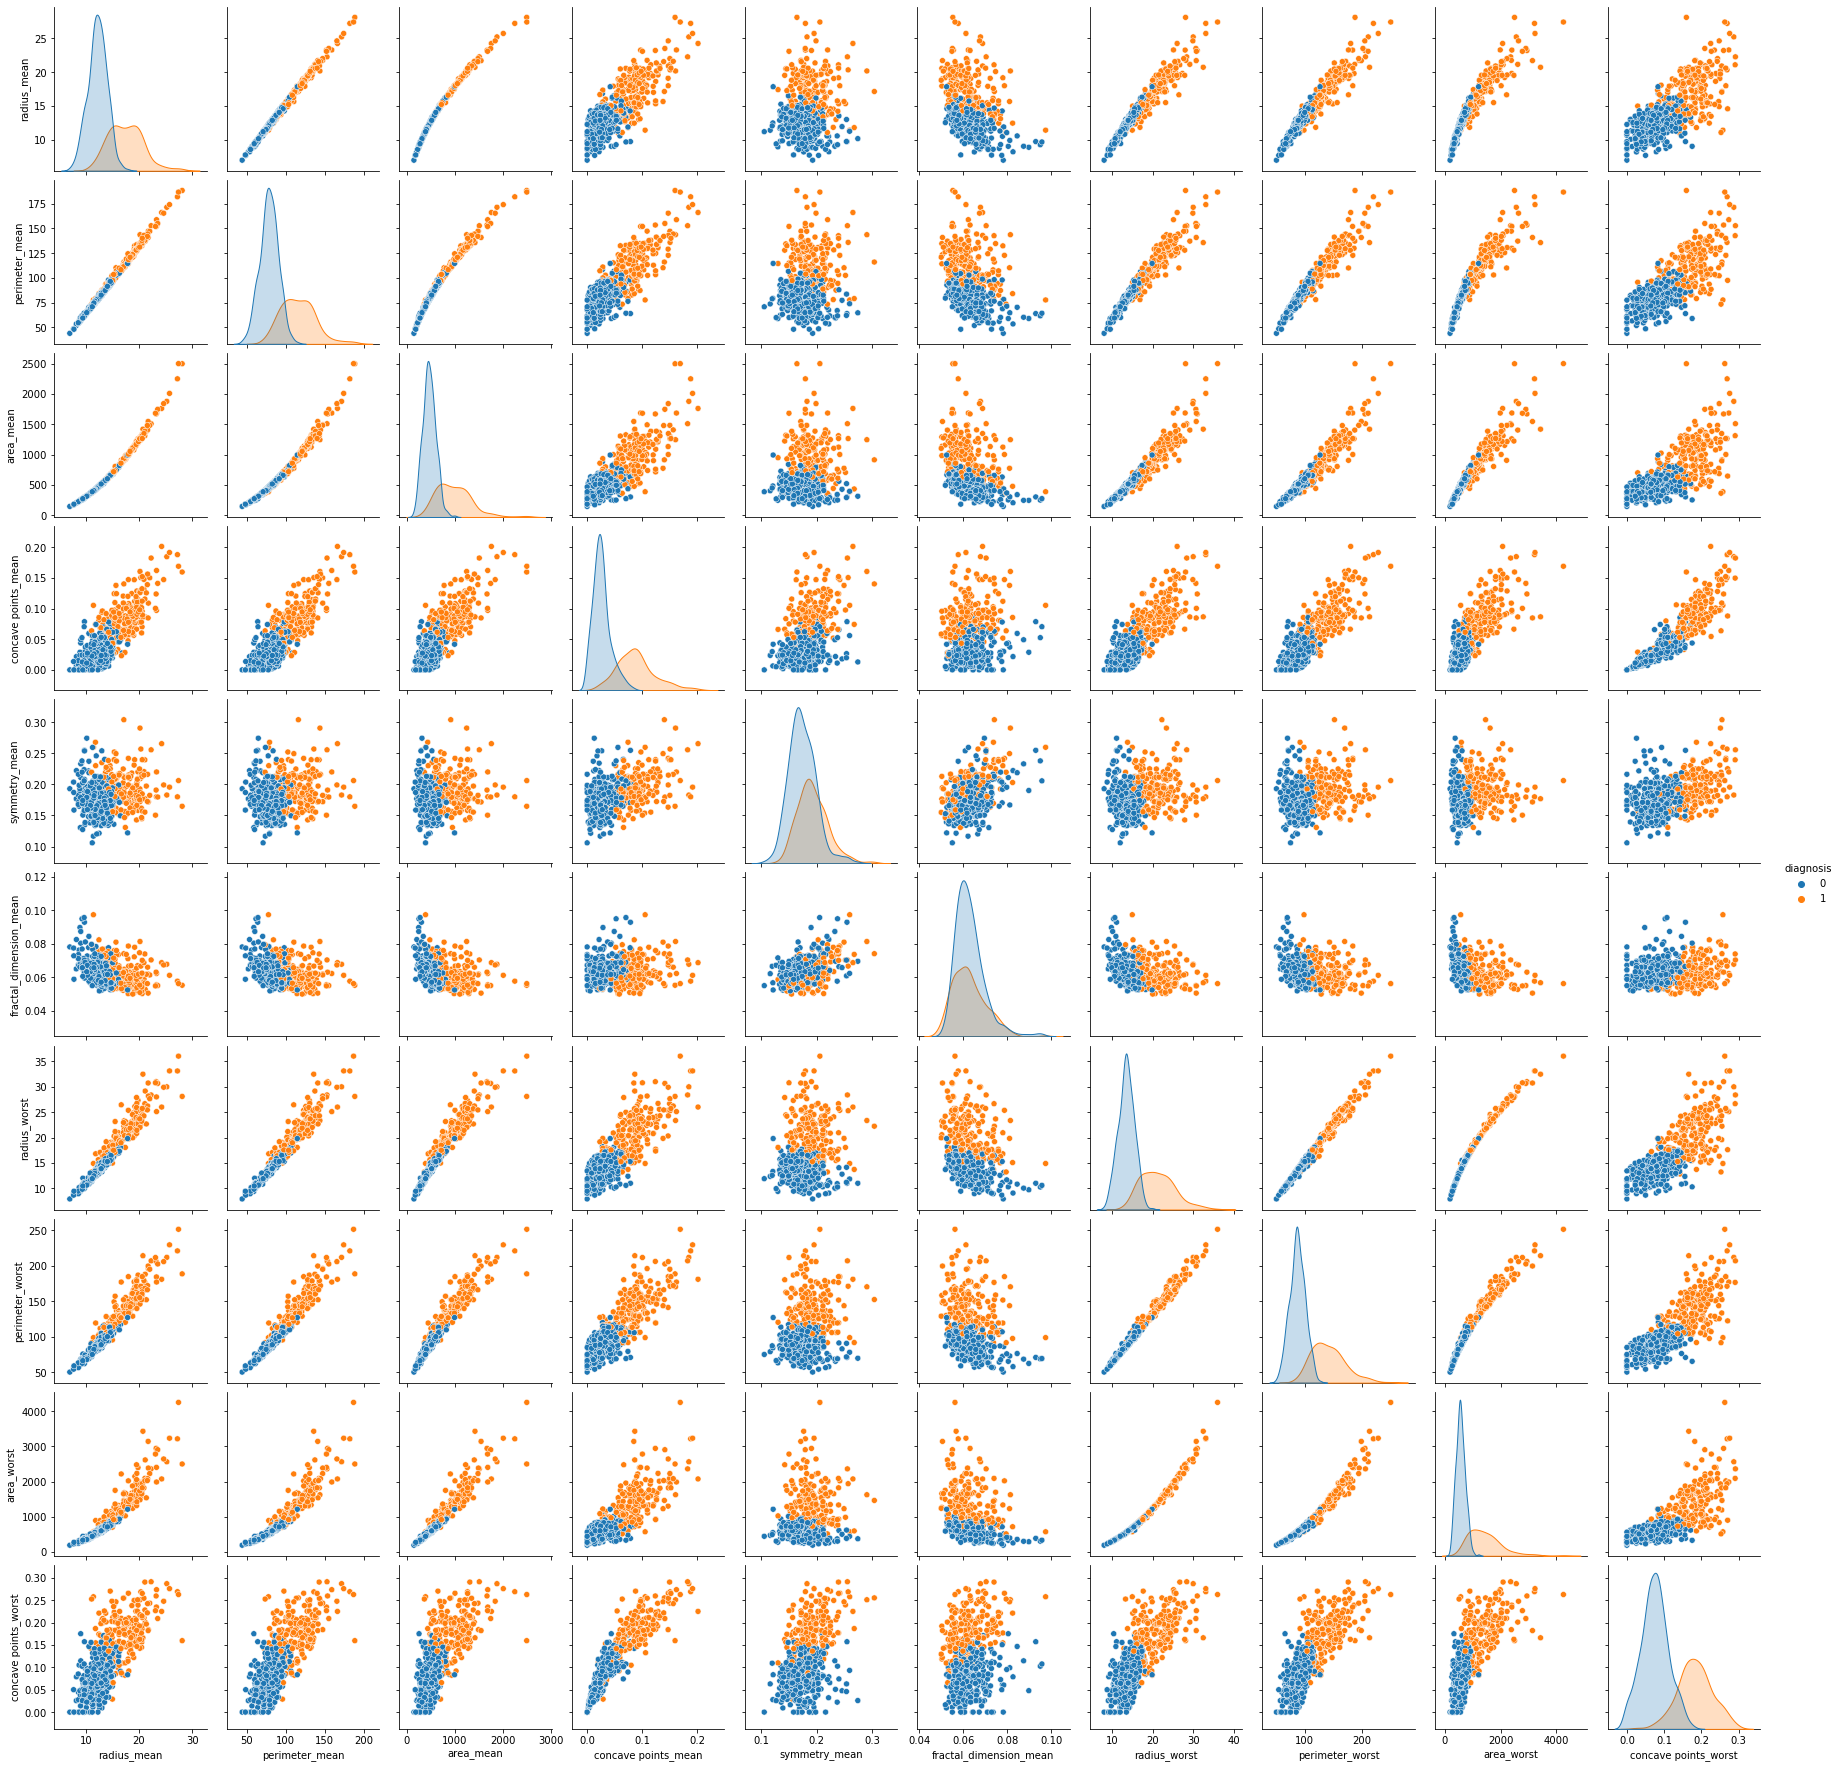

In [46]:
sns.pairplot(cancer, hue='diagnosis')


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

x=cancer.drop('diagnosis', axis=1)
y=cancer['diagnosis']


x_train ,x_test, y_train ,y_test=train_test_split(x, y, test_size=0.3, random_state=42)
## apply the peprocessing 
scaler=StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [67]:
from sklearn.metrics import accuracy_score,mean_squared_error, confusion_matrix, classification_report 
#Fonction d'affichage des scores
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Le score de précision: {accuracy_score(y_train, pred) * 100:.2f}%")
        print(f"Le taux d erreur : { mean_squared_error(y_train, pred)* 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Le score de précision: {accuracy_score(y_test, pred) * 100:.2f}%")
        print(f"Le taux d erreur : { mean_squared_error(y_test, pred)* 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        # The confusion matrix
        confus = confusion_matrix(y_test, pred)
        f, ax = plt.subplots(figsize=(5,5))
        sns.heatmap(confus, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
        plt.title('Confusion Matrix')
        plt.xlabel('Y predict')
        plt.ylabel('Y test')
        plt.show()

## Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
regr = linear_model.LinearRegression()

model=regr.fit(x_train, y_train)
predictions=regr.predict(x_test)

print("====================================")
print('Le taux d erreur: %.3f' % mean_squared_error(y_test, predictions))
print('La précision du modèle : %.3f'% r2_score(y_test, predictions))
print("====================================")


Le taux d erreur: 0.075
La précision du modèle : 0.679


## Logistic Regression

Train Result:
Le score de précision: 92.96%
Le taux d erreur : 7.04%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.940239    0.911565  0.929648    0.925902      0.929504
recall       0.947791    0.899329  0.929648    0.923560      0.929648
f1-score     0.944000    0.905405  0.929648    0.924703      0.929551
support    249.000000  149.000000  0.929648  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[236  13]
 [ 15 134]]

Test Result:
Le score de précision: 95.91%
Le taux d erreur : 4.09%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.954955   0.966667  0.959064    0.960811      0.959270
recall       0.981481   0.920635  0.959064    0.951058      0.959064
f1-score     0.968037   0.943089  0.959064    0.955563      0.958845
sup

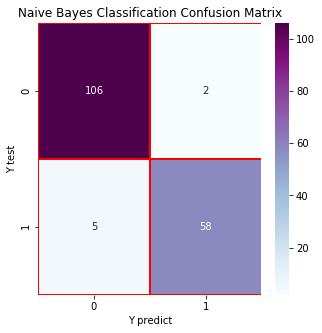

In [66]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train, y_train)
prediction=logistic.predict(x_test)

print_score(logistic, x_train, y_train, x_test, y_test, train=True)
print_score(logistic, x_train, y_train, x_test, y_test, train=False)

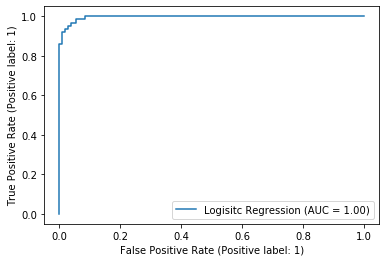

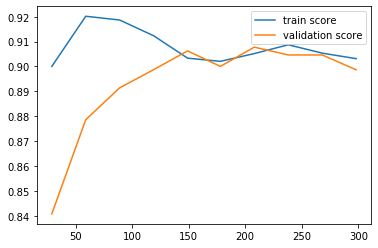

In [69]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import learning_curve

# ROC curve
plot_roc_curve(logistic, x_test, y_test,name="Logisitc Regression")
plt.show()

# Learning curve
train_size, train_score, val_score = learning_curve(logistic, x_train, y_train,cv=4, scoring='f1',train_sizes=np.linspace(0.1, 1, 10))
plt.plot(train_size, train_score.mean(axis=1), label='train score')
plt.plot(train_size, val_score.mean(axis=1), label='validation score')
plt.legend()

## Random Forest 

Train Result:
Le score de précision: 94.97%
Le taux d erreur : 5.03%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.942085    0.964029  0.949749    0.953057      0.950300
recall       0.979920    0.899329  0.949749    0.939624      0.949749
f1-score     0.960630    0.930556  0.949749    0.945593      0.949371
support    249.000000  149.000000  0.949749  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[244   5]
 [ 15 134]]

Test Result:
Le score de précision: 92.98%
Le taux d erreur : 7.02%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.921053   0.947368  0.929825    0.934211      0.930748
recall       0.972222   0.857143  0.929825    0.914683      0.929825
f1-score     0.945946   0.900000  0.929825    0.922973      0.929018
sup

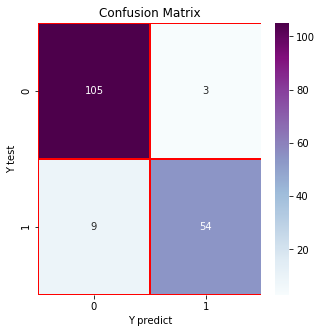

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=3)
rf.fit(x_train, y_train)

print_score(rf,  x_train, y_train, x_test, y_test, train=True)
print_score(rf,  x_train, y_train, x_test, y_test, train=False)

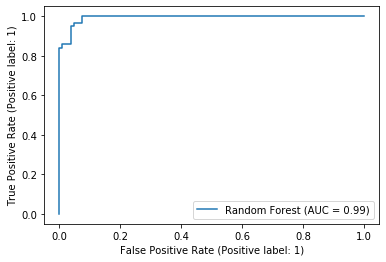

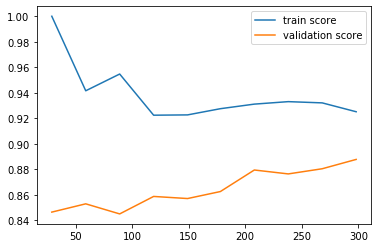

In [82]:
# ROC curve
plot_roc_curve(rf, x_test, y_test,name="Random Forest")
plt.show()

# Learning curve
train_size, train_score, val_score = learning_curve(rf, x_train, y_train,cv=4, scoring='f1',train_sizes=np.linspace(0.1, 1, 10))
plt.plot(train_size, train_score.mean(axis=1), label='train score')
plt.plot(train_size, val_score.mean(axis=1), label='validation score')
plt.legend()

## Decision Tree

Train Result:
Le score de précision: 94.72%
Le taux d erreur : 5.28%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.938462    0.963768  0.947236    0.951115      0.947936
recall       0.979920    0.892617  0.947236    0.936269      0.947236
f1-score     0.958743    0.926829  0.947236    0.942786      0.946795
support    249.000000  149.000000  0.947236  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[244   5]
 [ 16 133]]

Test Result:
Le score de précision: 92.98%
Le taux d erreur : 7.02%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.936364   0.918033  0.929825    0.927198      0.929610
recall       0.953704   0.888889  0.929825    0.921296      0.929825
f1-score     0.944954   0.903226  0.929825    0.924090      0.929581
sup

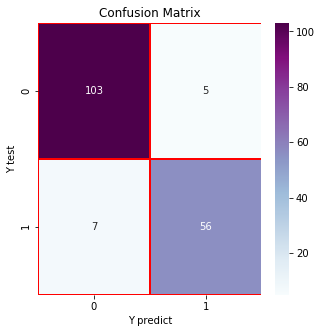

In [87]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier(max_depth=3)
decision.fit(x_train, y_train)
prediction=decision.predict(x_test)
print_score(decision,  x_train, y_train, x_test, y_test, train=True)
print_score(decision,  x_train, y_train, x_test, y_test, train=False)

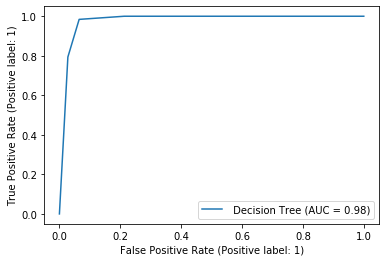

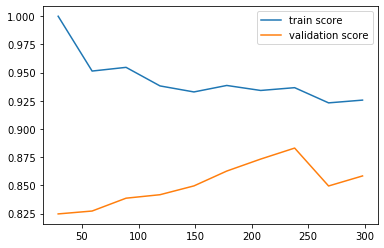

In [85]:
# ROC curve
plot_roc_curve(decision, x_test, y_test,name=" Decision Tree")
plt.show()

# Learning curve
train_size, train_score, val_score = learning_curve(decision, x_train, y_train,cv=4, scoring='f1',train_sizes=np.linspace(0.1, 1, 10))
plt.plot(train_size, train_score.mean(axis=1), label='train score')
plt.plot(train_size, val_score.mean(axis=1), label='validation score')
plt.legend()


## KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)
prediction=KNN.predict(x_test)
print_score(KNN,  x_train, y_train, x_test, y_test, train=True)
print_score(KNN,  x_train, y_train, x_test, y_test, train=False)

Train Result:
Le score de précision: 100.00%
Le taux d erreur : 0.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    249.0  149.0       1.0      398.0         398.0
_______________________________________________
Confusion Matrix: 
 [[249   0]
 [  0 149]]

Test Result:
Le score de précision: 93.57%
Le taux d erreur : 6.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.944954   0.919355  0.935673    0.932154      0.935523
recall       0.953704   0.904762  0.935673    0.929233      0.935673
f1-score     0.949309   0.912000  0.935673    0.930654      0.935563
support    108.000000  63.000000  0.935673  171.000000   

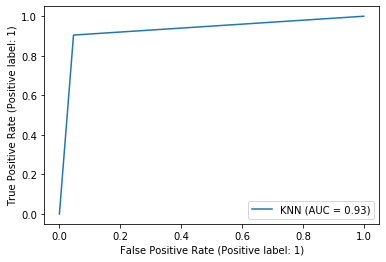

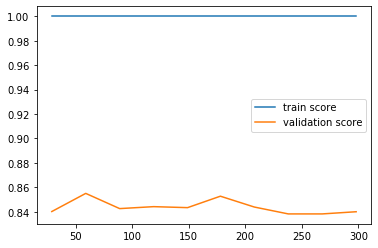

In [84]:
# ROC curve
plot_roc_curve(KNN, x_test, y_test,name="KNN")
plt.show()

# Learning curve
train_size, train_score, val_score = learning_curve(KNN, x_train, y_train,cv=4, scoring='f1',train_sizes=np.linspace(0.1, 1, 10))
plt.plot(train_size, train_score.mean(axis=1), label='train score')
plt.plot(train_size, val_score.mean(axis=1), label='validation score')
plt.legend()

## Naive_Bayes_Classifier

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
print_score(model,  x_train, y_train, x_test, y_test, train=True)
print_score(model,  x_train, y_train, x_test, y_test, train=False)


Train Result:
Le score de précision: 91.46%
Le taux d erreur : 8.54%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.918288    0.907801  0.914573    0.913045      0.914362
recall       0.947791    0.859060  0.914573    0.903426      0.914573
f1-score     0.932806    0.882759  0.914573    0.907782      0.914070
support    249.000000  149.000000  0.914573  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[236  13]
 [ 21 128]]

Test Result:
Le score de précision: 95.32%
Le taux d erreur : 4.68%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.938596   0.982456  0.953216    0.960526      0.954755
recall       0.990741   0.888889  0.953216    0.939815      0.953216
f1-score     0.963964   0.933333  0.953216    0.948649      0.952679
sup

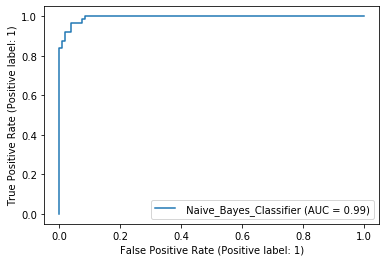

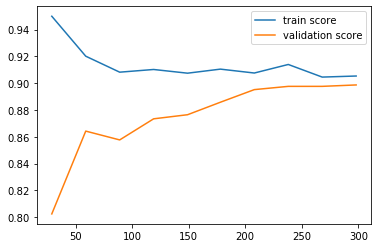

In [86]:
# ROC curve
plot_roc_curve(model, x_test, y_test,name=" Naive_Bayes_Classifier")
plt.show()

# Learning curve
train_size, train_score, val_score = learning_curve(model, x_train, y_train,cv=4, scoring='f1',train_sizes=np.linspace(0.1, 1, 10))
plt.plot(train_size, train_score.mean(axis=1), label='train score')
plt.plot(train_size, val_score.mean(axis=1), label='validation score')
plt.legend()

# SVM

### a. Linear Support Vector Classification

Train Result:
Le score de précision: 93.22%
Le taux d erreur : 6.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.940476    0.917808  0.932161    0.929142      0.931990
recall       0.951807    0.899329  0.932161    0.925568      0.932161
f1-score     0.946108    0.908475  0.932161    0.927291      0.932019
support    249.000000  149.000000  0.932161  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[237  12]
 [ 15 134]]

Test Result:
Le score de précision: 94.74%
Le taux d erreur : 5.26%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.938053   0.965517  0.947368    0.951785      0.948171
recall       0.981481   0.888889  0.947368    0.935185      0.947368
f1-score     0.959276   0.925620  0.947368    0.942448      0.946876
sup

/home/tachour/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


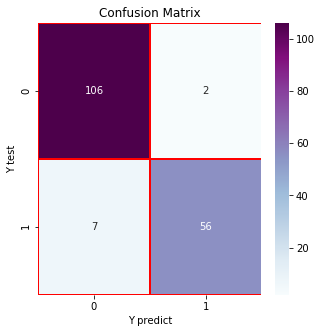

In [79]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(x_train, y_train)

print_score(model, x_train, y_train, x_test, y_test, train=True)
print_score(model, x_train, y_train, x_test, y_test, train=False)

### b. Support Vector Classification 
#### Polynomial Kernel SVM 

Train Result:
Le score de précision: 93.72%
Le taux d erreur : 6.28%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.927481    0.955882  0.937186    0.941682      0.938114
recall       0.975904    0.872483  0.937186    0.924193      0.937186
f1-score     0.951076    0.912281  0.937186    0.931679      0.936552
support    249.000000  149.000000  0.937186  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[243   6]
 [ 19 130]]

Test Result:
Le score de précision: 94.15%
Le taux d erreur : 5.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.937500   0.949153   0.94152    0.943326      0.941793
recall       0.972222   0.888889   0.94152    0.930556      0.941520
f1-score     0.954545   0.918033   0.94152    0.936289      0.941093
sup

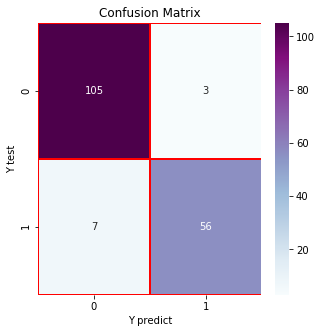

In [80]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=4, C=5)
model.fit(x_train, y_train)
prediction=model.predict(x_test)

print_score(model, x_train, y_train, x_test, y_test, train=True)
print_score(model, x_train, y_train,x_test, y_test, train=False)

#### Radial Kernel SVM

Train Result:
Le score de précision: 92.96%
Le taux d erreur : 7.04%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.926641    0.935252  0.929648    0.930946      0.929865
recall       0.963855    0.872483  0.929648    0.918169      0.929648
f1-score     0.944882    0.902778  0.929648    0.923830      0.929119
support    249.000000  149.000000  0.929648  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[240   9]
 [ 19 130]]

Test Result:
Le score de précision: 94.74%
Le taux d erreur : 5.26%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.930435   0.982143  0.947368    0.956289      0.949485
recall       0.990741   0.873016  0.947368    0.931878      0.947368
f1-score     0.959641   0.924370  0.947368    0.942006      0.946646
sup

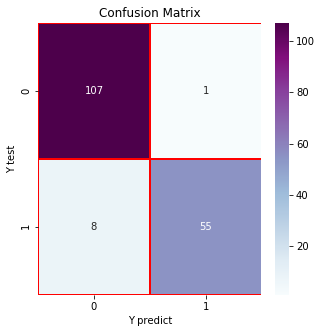

In [81]:
model = SVC(kernel='rbf', gamma=0.1, C=1.0)
model.fit( x_train, y_train)
prediction=model.predict(x_test)

print_score(model,  x_train, y_train, x_test, y_test, train=True)
print_score(model,  x_train, y_train, x_test, y_test, train=False)

## Principal Component Analysis

Comme nous l'avons déjà remarqué, il est difficile de visualiser des données de haute dimension, nous pouvons utiliser PCA pour trouver les deux premiers composants principaux et visualiser les données dans ce nouvel espace bidimensionnel, avec un seul nuage de points. Avant de faire cela, nous devrons mettre à l'échelle nos données afin que chaque entité ait une seule variance unitaire.

Text(0, 0.5, 'Second Principal Component')

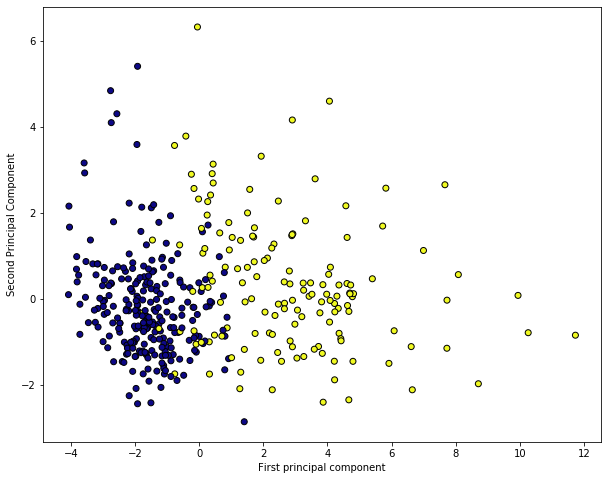

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
plt.figure(figsize=(10,8))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap='plasma', edgecolor='k')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')